# AST 7939 Week 2

## k-nearest neighbors & decision trees

### Let's load the scikit-learn module and load the Iris dataset.

In [1]:
#If you need to install sklearn on your machine, see https://scikit-learn.org/stable/install.html
from sklearn import datasets

#load Iris data (sklearn offers quite a few datasets)
iris = datasets.load_iris()

### What's in the dataset? When you have no idea what the dataset looks like, use help.

In [2]:
help(iris)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __se

### So iris is a "Bunch" object (which is similar to dictionary). If you want to see what "keys" exist,


In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Let's print out the description first.

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### What's in target_names?

In [7]:
# We can use either iris.target_names or iris['target_names']
iris.target_names, iris.target_names.shape
#iris['target_names']

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'), (3,))

### What's in feature_names?

In [10]:
iris.feature_names, type(iris.feature_names)

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 list)

### Let's have a look at the data.

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Let's check out the shape of the data array.

In [8]:
iris.data.shape

(150, 4)

### Let's visualize the data -- Petal width vs. Petal length. Since our goal is to classify the data, it might be wise to color-code the data points by target name.


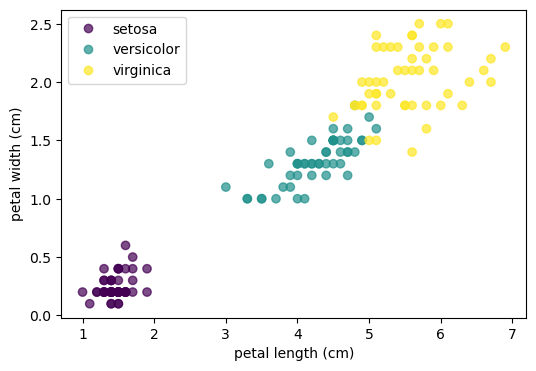

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

#This is to make sure that the color scale uses minimum = 0 & maximum = 2.
norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

plot = ax.scatter(iris.data[:,2], iris.data[:,3], alpha=0.7, c=iris.target, cmap='viridis', norm=norm)

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot.legend_elements()[0], iris.target_names)

### Let's first use kNN to make a model that can predict the class of new data points based on petal length and width.

In [1]:
from sklearn import neighbors

### Prepare the data for the ML algorithm.

In [11]:
#This is how you get the training dataset which you want to use to build your model
from sklearn.model_selection import train_test_split

#Features in "X" (matrix), label in "y" (vector)
X = iris.data[:,2:] #features, 2: -> only petal length and petal width
y = iris.target #labels

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#X_train and X_test are the data points, y_train and y_test are the corresponding labels

In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

### Let's check the data shape

In [25]:
X_train.shape, X_test.shape

((112, 2), (38, 2))

In [24]:
y_train.shape, y_test.shape

((112,), (38,))

### We can also visualize train/test datasets.

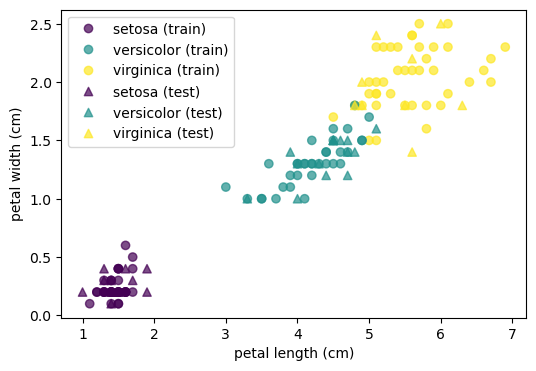

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', norm=norm, marker='^')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### For kNN, we need feature scaling.

In [15]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

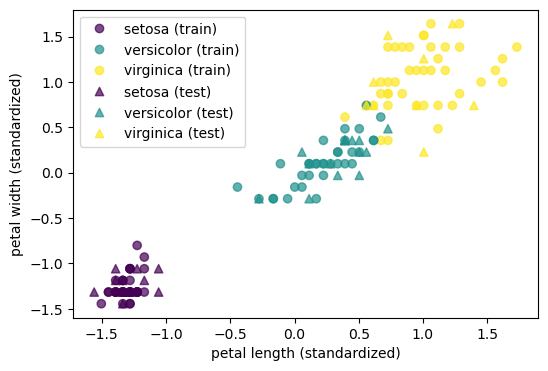

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train_scaled[:,0], X_train_scaled[:,1], alpha=0.7, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test_scaled[:,0], X_test_scaled[:,1], alpha=0.7, c=y_test, cmap='viridis', norm=norm, marker='^')

ax.set_xlabel('petal length (standardized)')
ax.set_ylabel('petal width (standardized)')
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

plt.savefig('iris_scaling.png', transparent=True, dpi=300)

### Train the machine

In [27]:
# Train a kNN Model with k=3
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [28]:
help(neighbors.KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [29]:
model.get_params() #set by me or default

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [30]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Training accuracy

In [31]:
model.score(X_train_scaled, y_train)

/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9642857142857143

### Test accuracy

In [32]:
model.score(X_test_scaled, y_test)

/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9736842105263158

### Always try to look into the details of the result. If you don't, ML will stay as a black box for you!

In [33]:
print('True label:\n', y_test)
print('Prediction:\n', model.predict(X_test_scaled))

True label:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
import numpy as np

ind_wrong = np.where(y_test != model.predict(X_test_scaled))[0][0]
ind_wrong

/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


37

In [37]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors

model.kneighbors([X_test_scaled[ind_wrong]]) #Returns distance to neighbors and indicies of neighbors
ind_neighbors = model.kneighbors([X_test_scaled[ind_wrong]])[1].flatten()
ind_neighbors #index of the 3 neighbors

array([17, 95, 10])

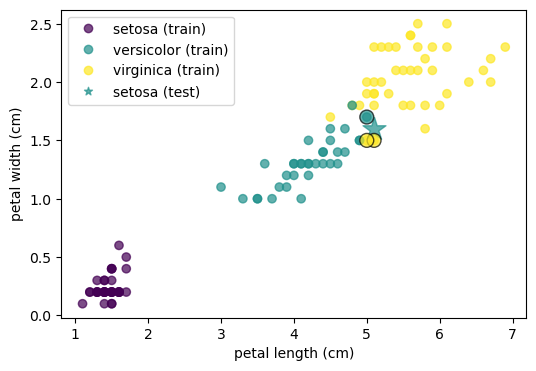

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', norm=norm)
# plot_test = ax.scatter(X_test[-1,0], X_test[-1,1], alpha=0.7, c=y_test[-1], cmap='viridis', norm=norm, 
#                        marker='*', s=300)
plot_test = ax.scatter(X_test[ind_wrong,0], X_test[ind_wrong,1], alpha=0.7, c=y_test[ind_wrong], cmap='viridis', norm=norm, 
                       marker='*', s=300)
plot_neighbors = ax.scatter(X_train[ind_neighbors,0], X_train[ind_neighbors,1], 
                            alpha=0.7, c=y_train[ind_neighbors], cmap='viridis', 
                            norm=norm, edgecolor='k', s=100)

#ax.scatter(new_data[:,0], new_data[:,1], alpha=1, 
#           c=model.predict(new_data_scaled), cmap='viridis', norm=norm, marker='*', s=200)

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

#model mistake is understandable and okay

In [40]:
model.predict_proba(X_test_scaled)


#WHAT IS THIS? -> probability of each data point being one of the labels

array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.

### New data and model prediction

In [44]:
import numpy as np

new_data = np.array([[2, 1], [5, 1], [4.7, 2]])

In [45]:
new_data_scaled = StandardScaler().fit(X_train).transform(new_data)
new_data_scaled

array([[-1.00211332, -0.28693357],
       [ 0.671396  , -0.28693357],
       [ 0.50404507,  0.99852882]])

In [46]:
model.predict(new_data_scaled)

/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 2])

### Let's visualize to see if it makes sense.

/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


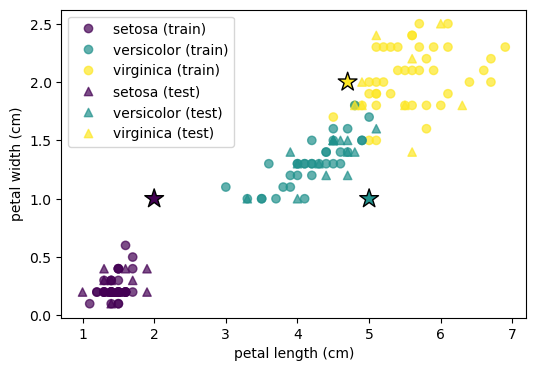

In [47]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', norm=norm, marker='^')

ax.scatter(new_data[:,0], new_data[:,1], alpha=1, 
           c=model.predict(new_data_scaled), cmap='viridis', norm=norm, marker='*', s=200, edgecolor='k')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### Let's compute the decision boundary. Generalize the model.

In [48]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

print(x_min, x_max, y_min, y_max)

0.0 7.9 -0.9 3.5


In [49]:
#I just wanted to make sure that the values are physical. 
x_min = np.max([x_min, 0.])
y_min = np.max([y_min, 0.])

print(x_min, x_max, y_min, y_max)

0.0 7.9 0.0 3.5


### Make a two-dimensional grid using numpy.meshgrid

In [50]:
#See https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


### How does the mesh look like?

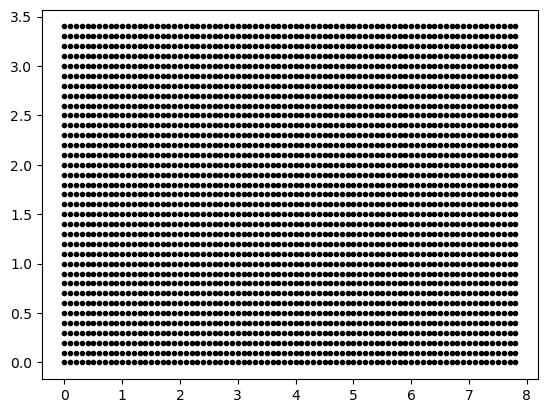

In [51]:
plt.plot(xpts, ypts, ".k")
plt.show()

### For each point, we make model prediction.

In [52]:
#This is to make a data structure that is consistent with the training/test datasets.

grid_scaled = StandardScaler().fit(X_train).transform(np.c_[xpts.ravel(), ypts.ravel()])

Z = model.predict(grid_scaled)

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(xpts.shape)

/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Let's visualize the decision boundary.

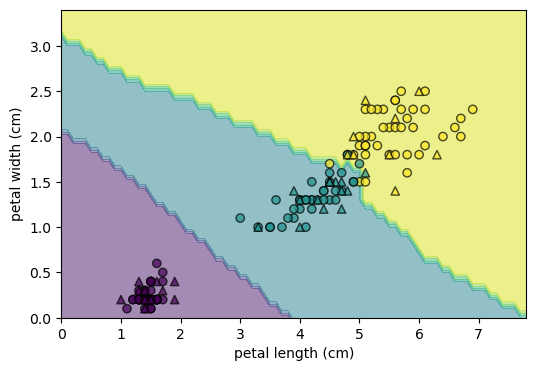

In [53]:
fig, ax = plt.subplots(figsize=(6, 4))

#Two-dimensional contour plot.
#See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
ax.contourf(xpts, ypts, Z, alpha=0.5)

#Let's over-plot training/test data points.
plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', 
                        norm=norm, edgecolor='black')
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', 
                       norm=norm, marker='^', edgecolor='black')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

plt.savefig('iris_knn.png', transparent=True, dpi=300)

### TODO: We used k=3 for the example above. Vary the number of neighbors from 1 to 30 (hint: use a for loop.) and check how training and test accuracy change by making a plot showing training/test accuracy vs. k. 

In [131]:
import warnings
warnings.filterwarnings("ignore")

train_acc = []
test_acc = []

for k in range(1,100,1):
    
    #Create the model
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    #Fit the training data to the model
    model.fit(X_train_scaled, y_train)
    
    train_acc.append(model.score(X_train_scaled, y_train))
    test_acc.append(model.score(X_test_scaled, y_test))

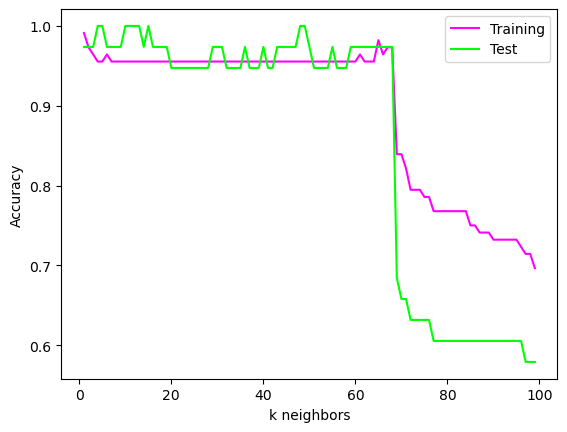

In [133]:
#Plotting
kvalues = range(1,100,1)

plt.plot(kvalues, train_acc, label='Training', color='fuchsia')
plt.plot(kvalues, test_acc, label='Test', color='lime')

plt.legend()
plt.xlabel('k neighbors')
plt.ylabel('Accuracy');


#In training, when kNN=1 the nearest neighbor is the data point itself
#-> not exactly 100% accuracy bc of overlapping data points

### Now, let's try Decision Trees.

In [135]:
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=2, random_state=0)

In [76]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [136]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [78]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [137]:
model.score(X_train, y_train)

0.9642857142857143

In [138]:
model.score(X_test, y_test)

0.8947368421052632

### Visualize the tree structure.

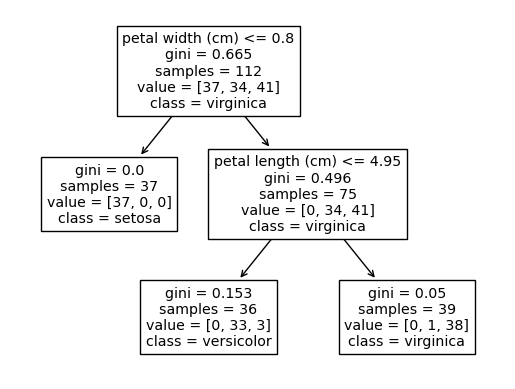

In [79]:
plot_tree(model, feature_names=iris.feature_names[2:], class_names=iris.target_names)
print('') #This is simply to suppress the massive output texts.

#value = [37,34,41] is the number of data points in each label

In [80]:
print('True label:\n', y_test)
print('Prediction:\n', model.predict(X_test))

True label:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2]


### Let's visualize the decision boundary.

In [81]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#I just wanted to make sure that the values are physical. 
x_min = np.max([x_min, 0.])
y_min = np.max([y_min, 0.])

#See https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

#This is to make a data structure that is consistent with the training/test datasets.
Z = model.predict(np.c_[xpts.ravel(), ypts.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(xpts.shape)

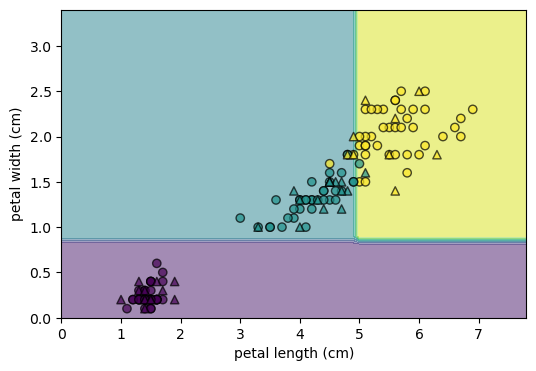

In [82]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.contourf(xpts, ypts, Z, alpha=0.5, cmap='viridis')

#Let's over-plot training/test data points.
plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='viridis', 
                        norm=norm, edgecolor='black')
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='viridis', 
                       norm=norm, marker='^', edgecolor='black')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

plt.savefig('iris_dt.png', transparent=True, dpi=300)

#There are a couple wrong classification around the vertical boundary

### One of the cool things about DT is that we can check feature importance.

In [83]:
print(iris.feature_names[2:])
print(model.feature_importances_)

['petal length (cm)', 'petal width (cm)']
[0.44366614 0.55633386]


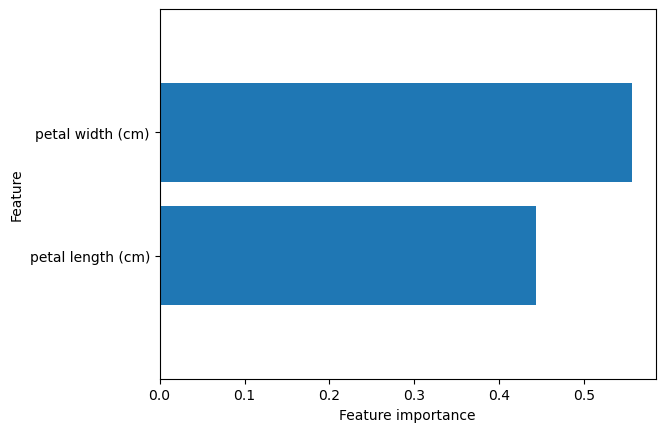

In [84]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names[2:])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)

### TODO: Does DT work better if we increase max_depth? Vary max_depth parameter from 1 to 6 and check training/test accuracy.

Answer: Yes, DT seems to be more accurate when I increase max_depth

In [145]:
train_acc = []
test_acc = []

for max_depth in range(1,7,1):
    
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)

    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    
print(range(1,6,1))

range(1, 6)


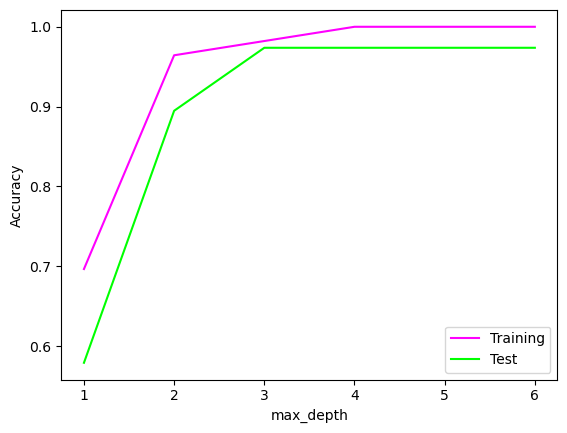

In [144]:
max_depth = range(1,7,1)

plt.plot(max_depth, train_acc, label='Training', color='fuchsia')
plt.plot(max_depth, test_acc, label='Test', color='lime')

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy');

#something weird, accuracy should decrease at about max_depth > 4 -> check what my boundaries actually look like

### TODO: Does DT work better if we increase min_samples_leaf? Vary min_samples_leaf parameter from 1 to 6 and check training/test accuracy.

Answer: No, accuracy tanks if min_samples_leaf gets too large (~5)

In [141]:
train_acc = []
test_acc = []

for samples in range(1,6,1):
    
    model = DecisionTreeClassifier(random_state=0, min_samples_leaf=samples) #Note: I had to not specify max_depth because it was overriding my min_samples_leaf
    model.fit(X_train, y_train)
    
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

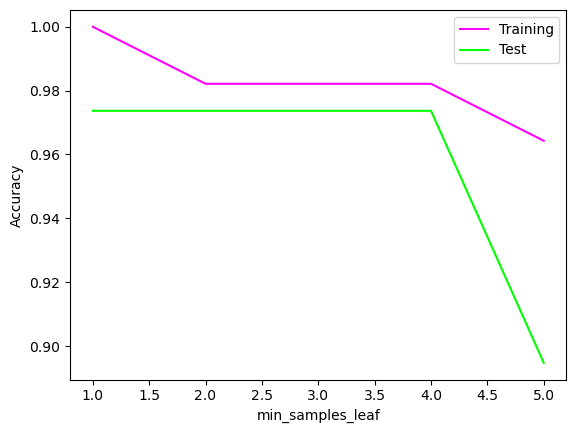

In [142]:
min_samples_leaf = range(1,6,1)

plt.plot(min_samples_leaf, train_acc, label='Training', color='fuchsia')
plt.plot(min_samples_leaf, test_acc, label='Test', color='lime')

plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy');

### Let's use all the features now.

In [89]:
#load Iris data
iris = datasets.load_iris()

#Features in "X" (matrix), label in "y" (vector)
X = iris.data
y = iris.target

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Train DT
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [90]:
print(iris.feature_names)
print(model.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.         0.42232109 0.57767891]


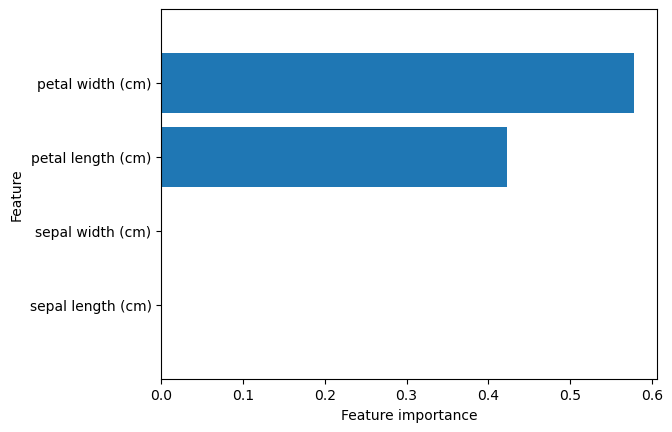

In [91]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(model)

#You can cut off not important features

In [ ]:
#Is this reducing dimensionality or something?